In [1]:
import SNPmanifold
from utilities import load_mquad, load_cellsnp
import numpy as np
from SNP_VAE_modified import *
import argparse
from pathlib import Path
import os
import pickle

In [2]:
folder_path = "/home/linxy29/data/maester/oagct/gctb2/variant_selection"
sample = ""
SNP_VAE_res = folder_path + sample + "/HEMO_pipeline_maester_cellSNP_celltype_gctb2TumorvsNorm_gctb2subset_analysis/WaldVariant_tumor/SNP_VAE_results/"
base_path = folder_path + sample + "/HEMO_pipeline_maester_cellSNP_celltype_gctb2TumorvsNorm_gctb2subset_analysis/WaldVariant_tumor/"

Start loading raw data.
Finish loading raw data.
Start filtering low-quality cells and SNPs.


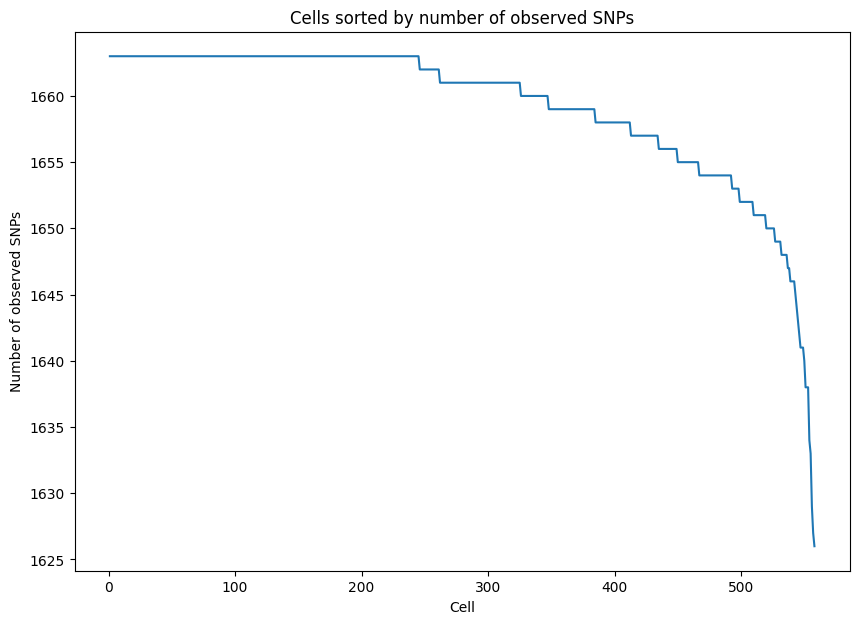

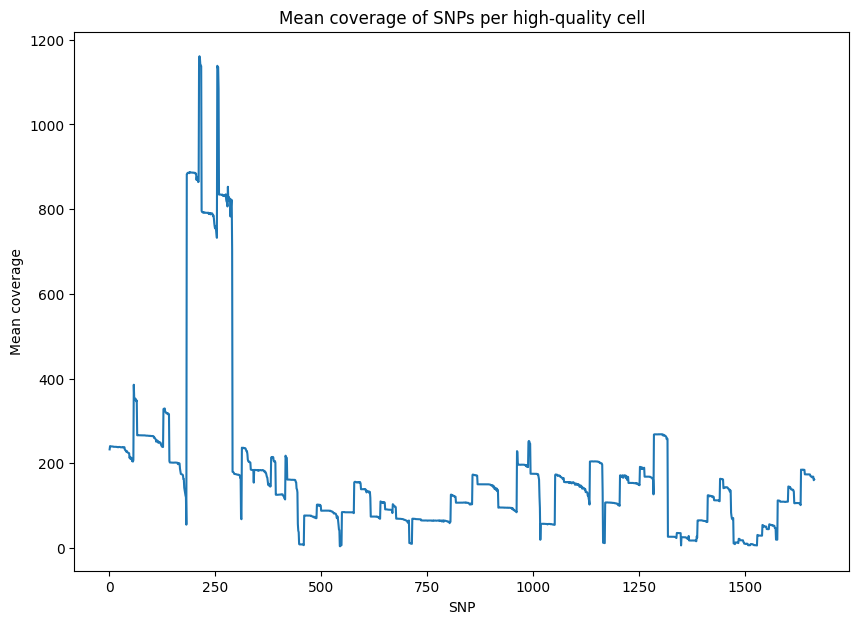

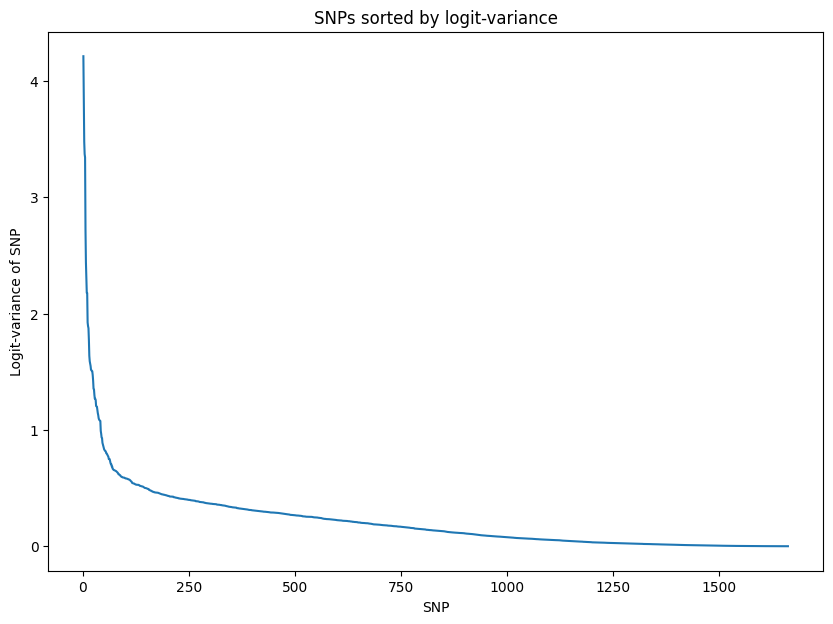

Finish filtering low-quality data, 558 cells and 1634 SNPs will be used for downstream analysis.
Start training VAE.
Epoch[10/2000], Cost: 12.101579
Epoch[20/2000], Cost: 10.988815
Epoch[30/2000], Cost: 10.912754
Epoch[40/2000], Cost: 10.893689
Epoch[50/2000], Cost: 10.885783
Epoch[60/2000], Cost: 10.882733
Epoch[70/2000], Cost: 10.881422
Epoch[80/2000], Cost: 10.878867
Epoch[90/2000], Cost: 10.877666
Epoch[100/2000], Cost: 10.876336
Epoch[200/2000], Cost: 10.868444
Epoch[300/2000], Cost: 10.859978
Epoch[400/2000], Cost: 10.851051
Epoch[500/2000], Cost: 10.842207
Epoch[600/2000], Cost: 10.832133
Epoch[700/2000], Cost: 10.822610
Epoch[800/2000], Cost: 10.812965
Epoch[900/2000], Cost: 10.803815
Epoch[1000/2000], Cost: 10.795781
Epoch[1100/2000], Cost: 10.787745
Epoch[1200/2000], Cost: 10.779297
Epoch[1300/2000], Cost: 10.770796
Epoch[1400/2000], Cost: 10.762828
Epoch[1500/2000], Cost: 10.754614
Epoch[1600/2000], Cost: 10.745787
Epoch[1700/2000], Cost: 10.736956
Epoch[1800/2000], Cost: 10

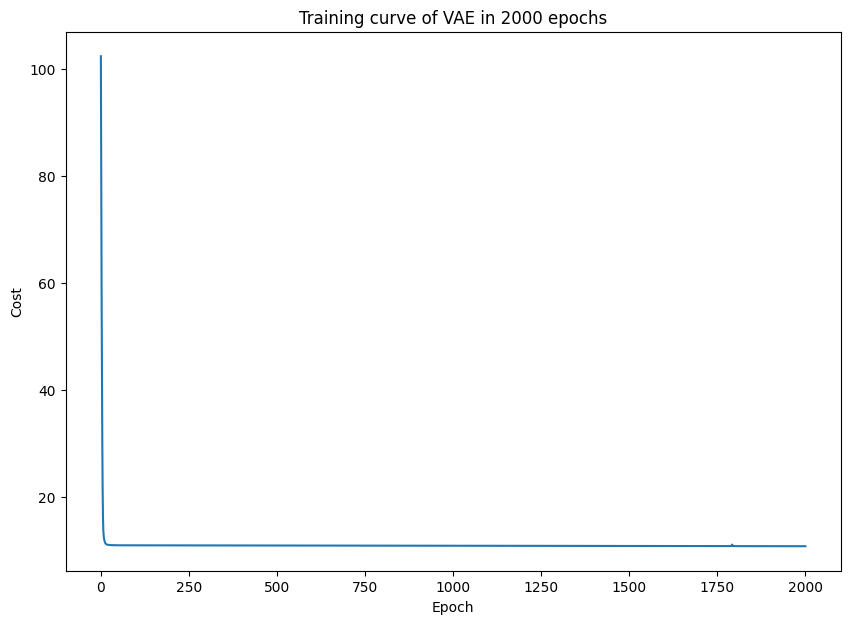

Start learning PCA and UMAP of latent space in VAE.
Finish learning, PCA and UMAP of latent space will be shown below.


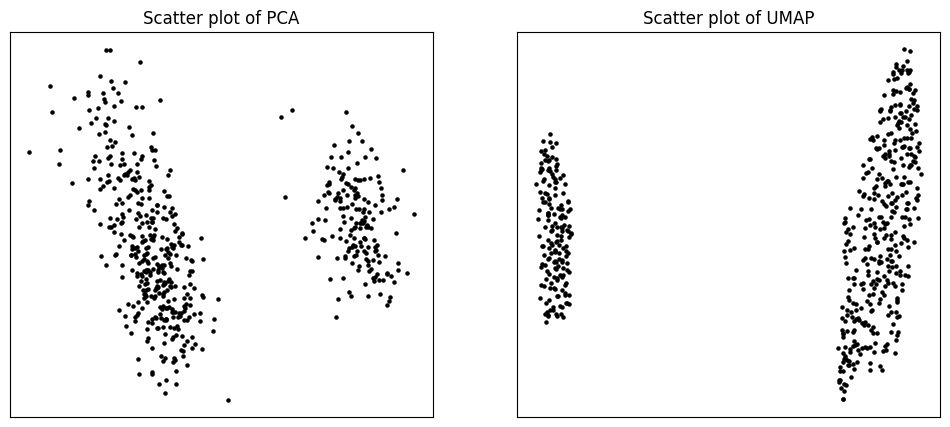

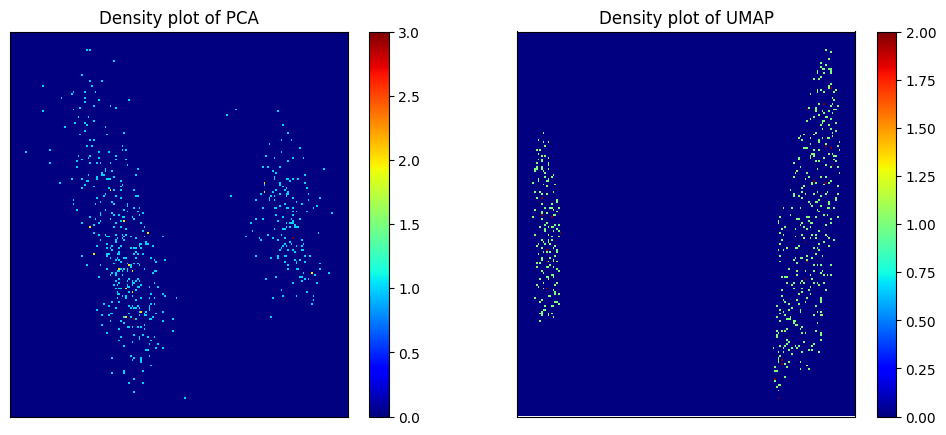

Start clustering.
2 clusters, Distortion: 759.877197
3 clusters, Distortion: 384.613190
4 clusters, Distortion: 291.830048
5 clusters, Distortion: 264.260742
6 clusters, Distortion: 229.383743
7 clusters, Distortion: 223.961624
8 clusters, Distortion: 200.644638
9 clusters, Distortion: 177.373276
10 clusters, Distortion: 160.835144
11 clusters, Distortion: 148.397491
12 clusters, Distortion: 138.465042
13 clusters, Distortion: 129.177795
14 clusters, Distortion: 119.407516
15 clusters, Distortion: 115.365250
16 clusters, Distortion: 109.792633
17 clusters, Distortion: 104.754227
18 clusters, Distortion: 107.695625
19 clusters, Distortion: 100.927925
20 clusters, Distortion: 91.526825
Finish clustering, PCA, UMAP, distortion, silhouette score of K-means clustering will be shown below.


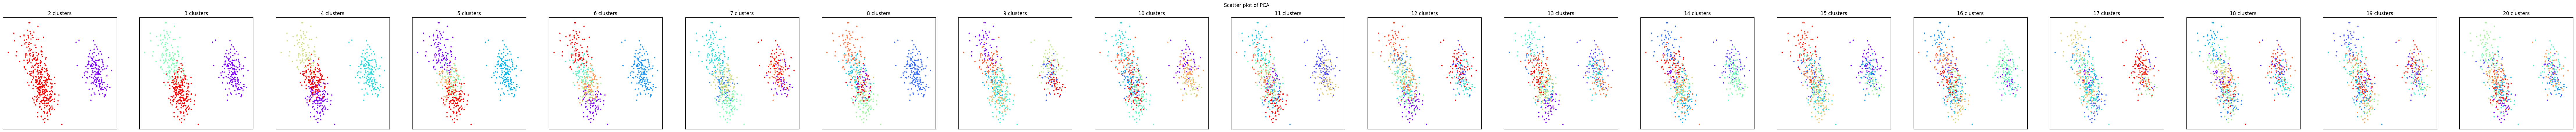

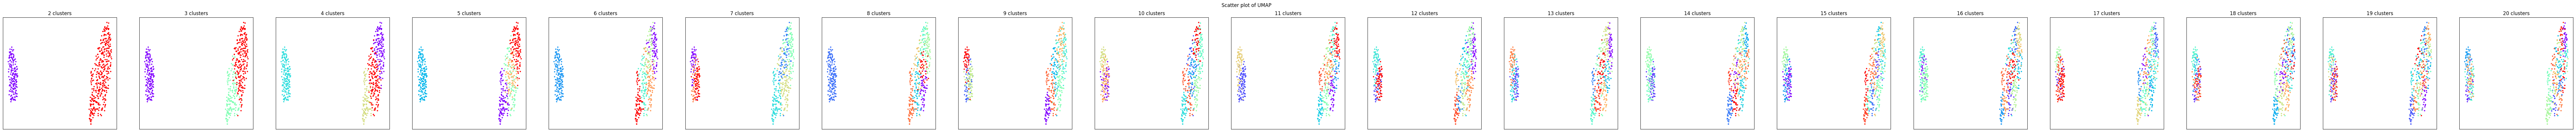

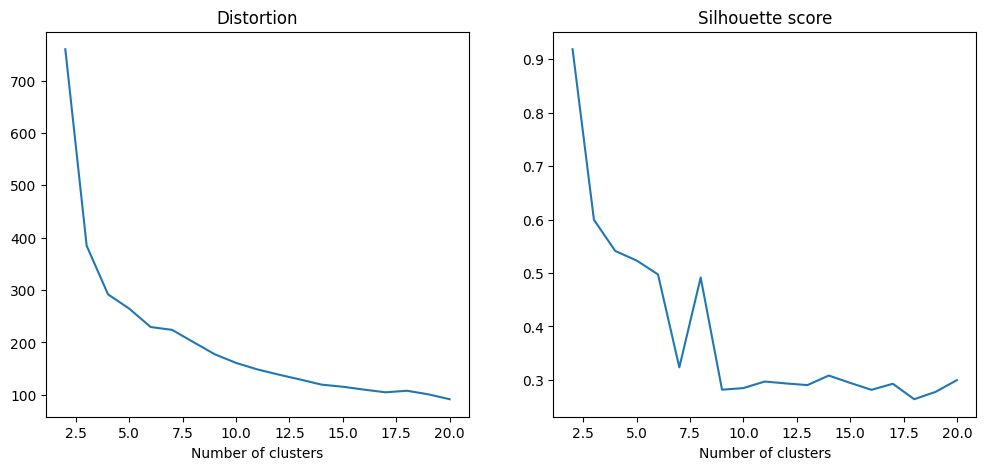

In [3]:
test1 = SNPmanifold.SNP_VAE(AD = base_path + "passed_ad.mtx", DP = base_path + "passed_dp.mtx", variant_name = base_path + "passed_variant_names.txt")
test1.filtering()
test1.training()
test1.clustering(algorithm = "kmeans_umap3d", max_cluster = 20)

PCA and UMAP of individual clusters will be shown below.


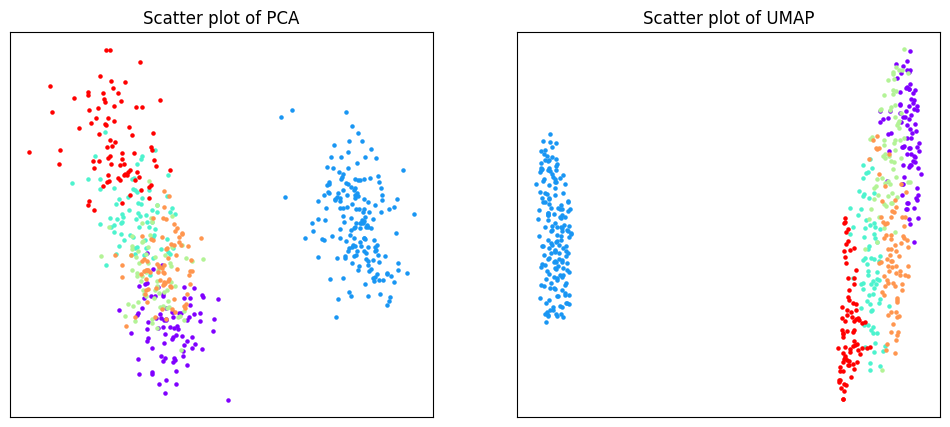

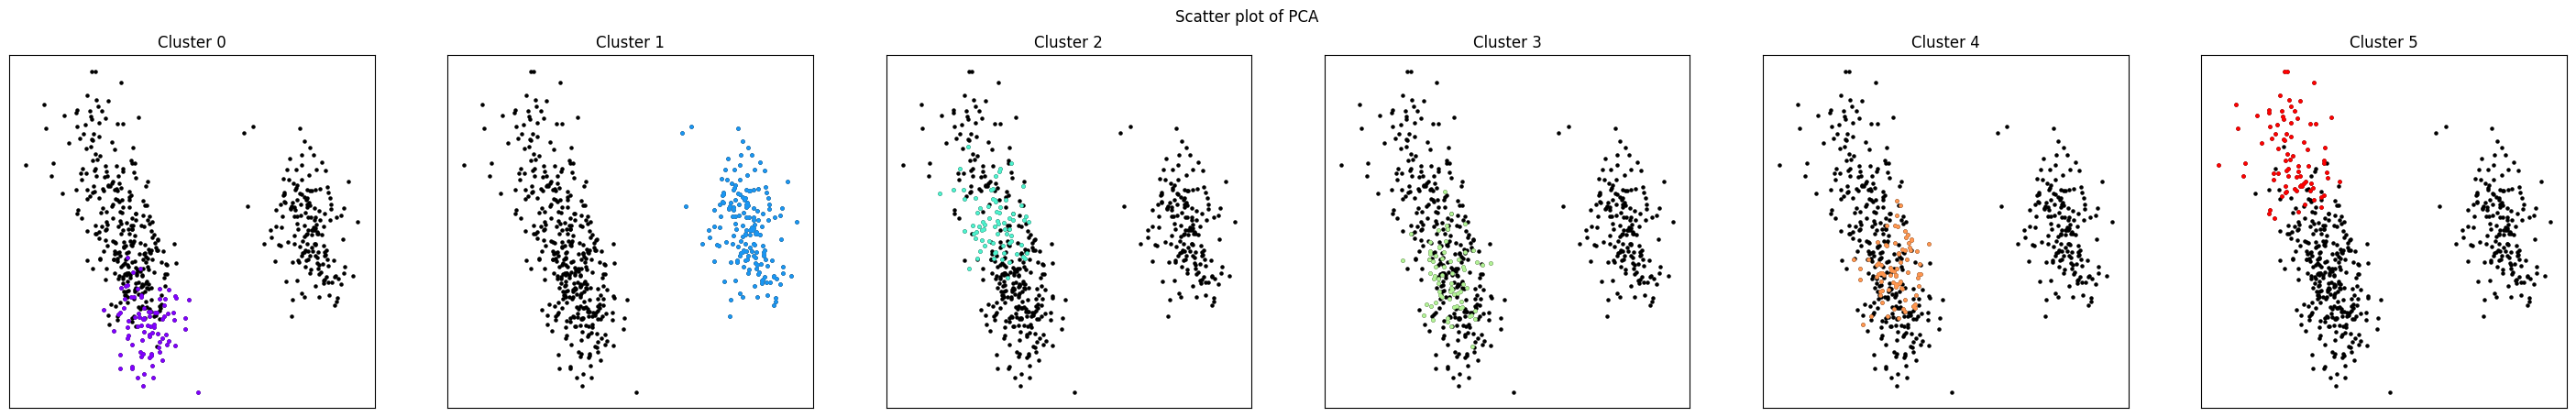

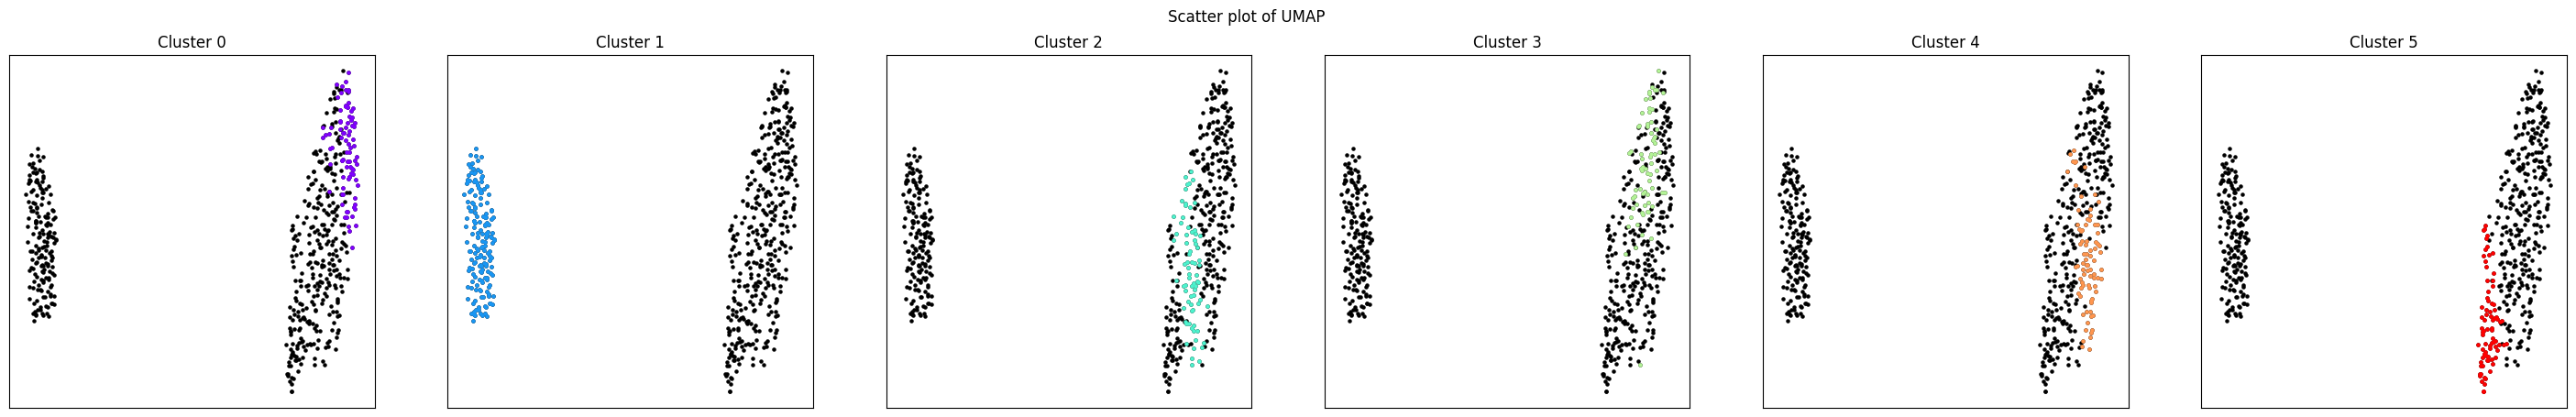

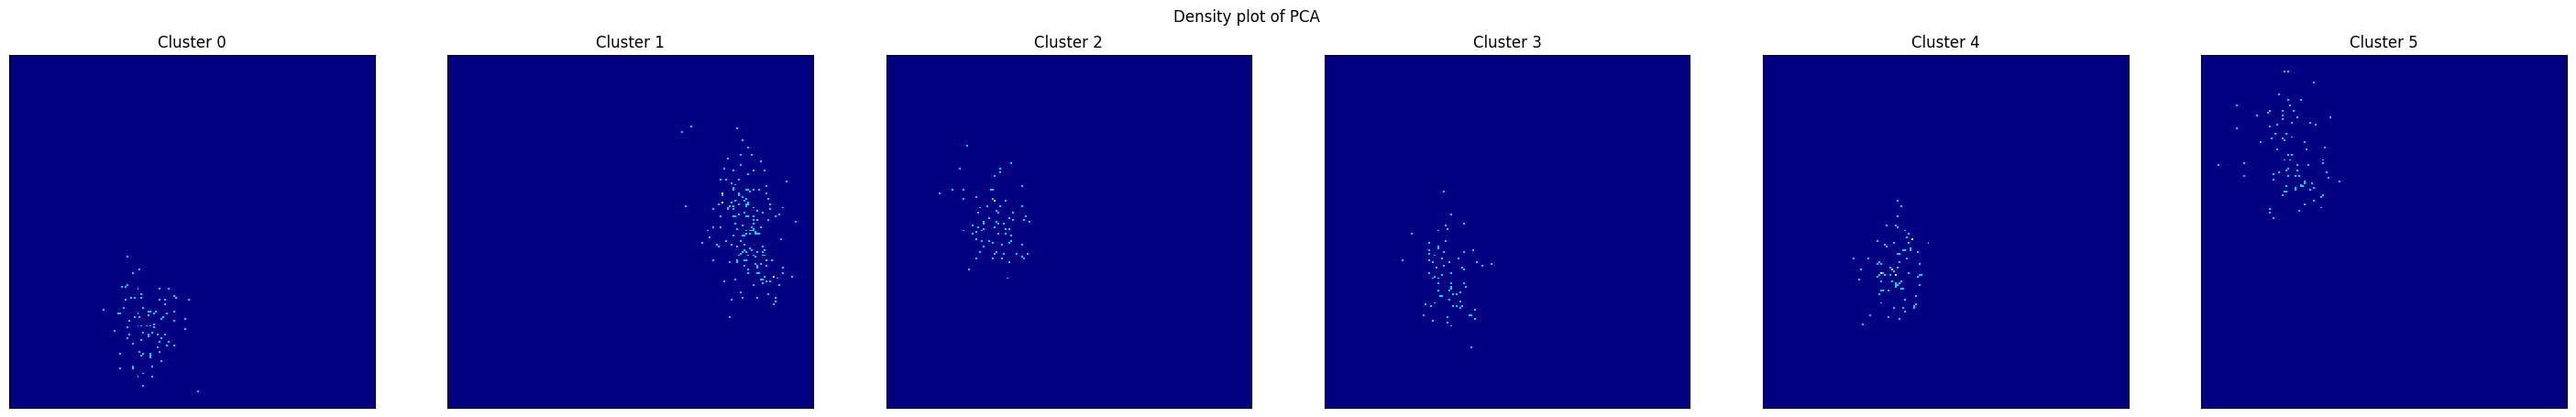

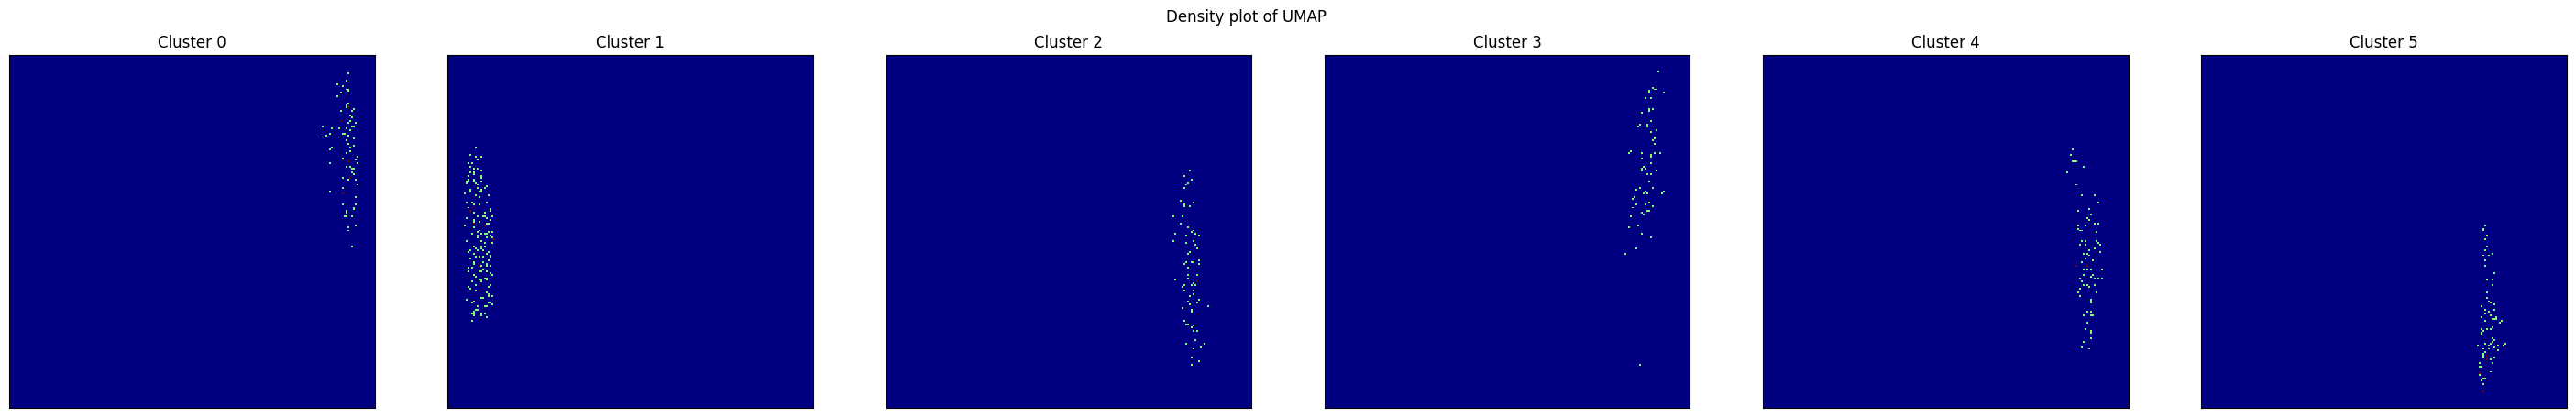

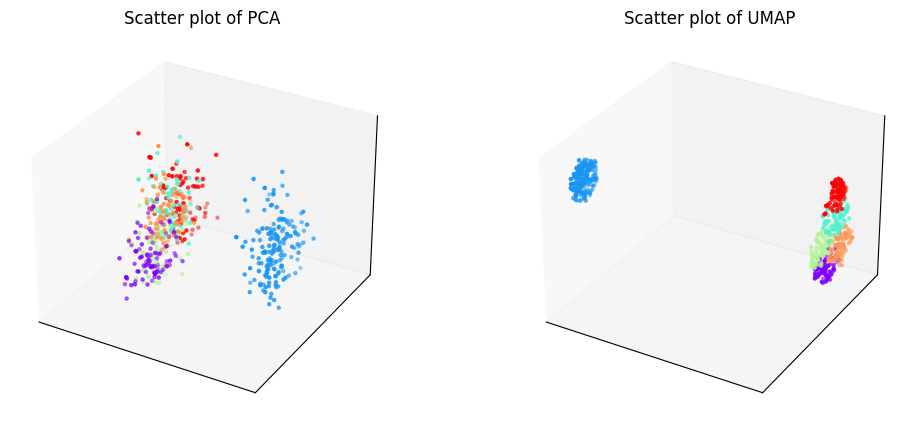

Phylogenetic tree in latent space will be shown below.


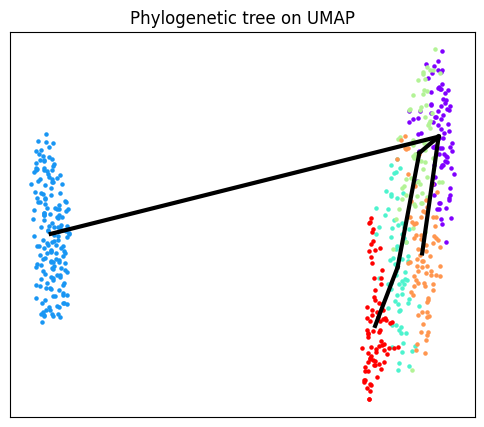

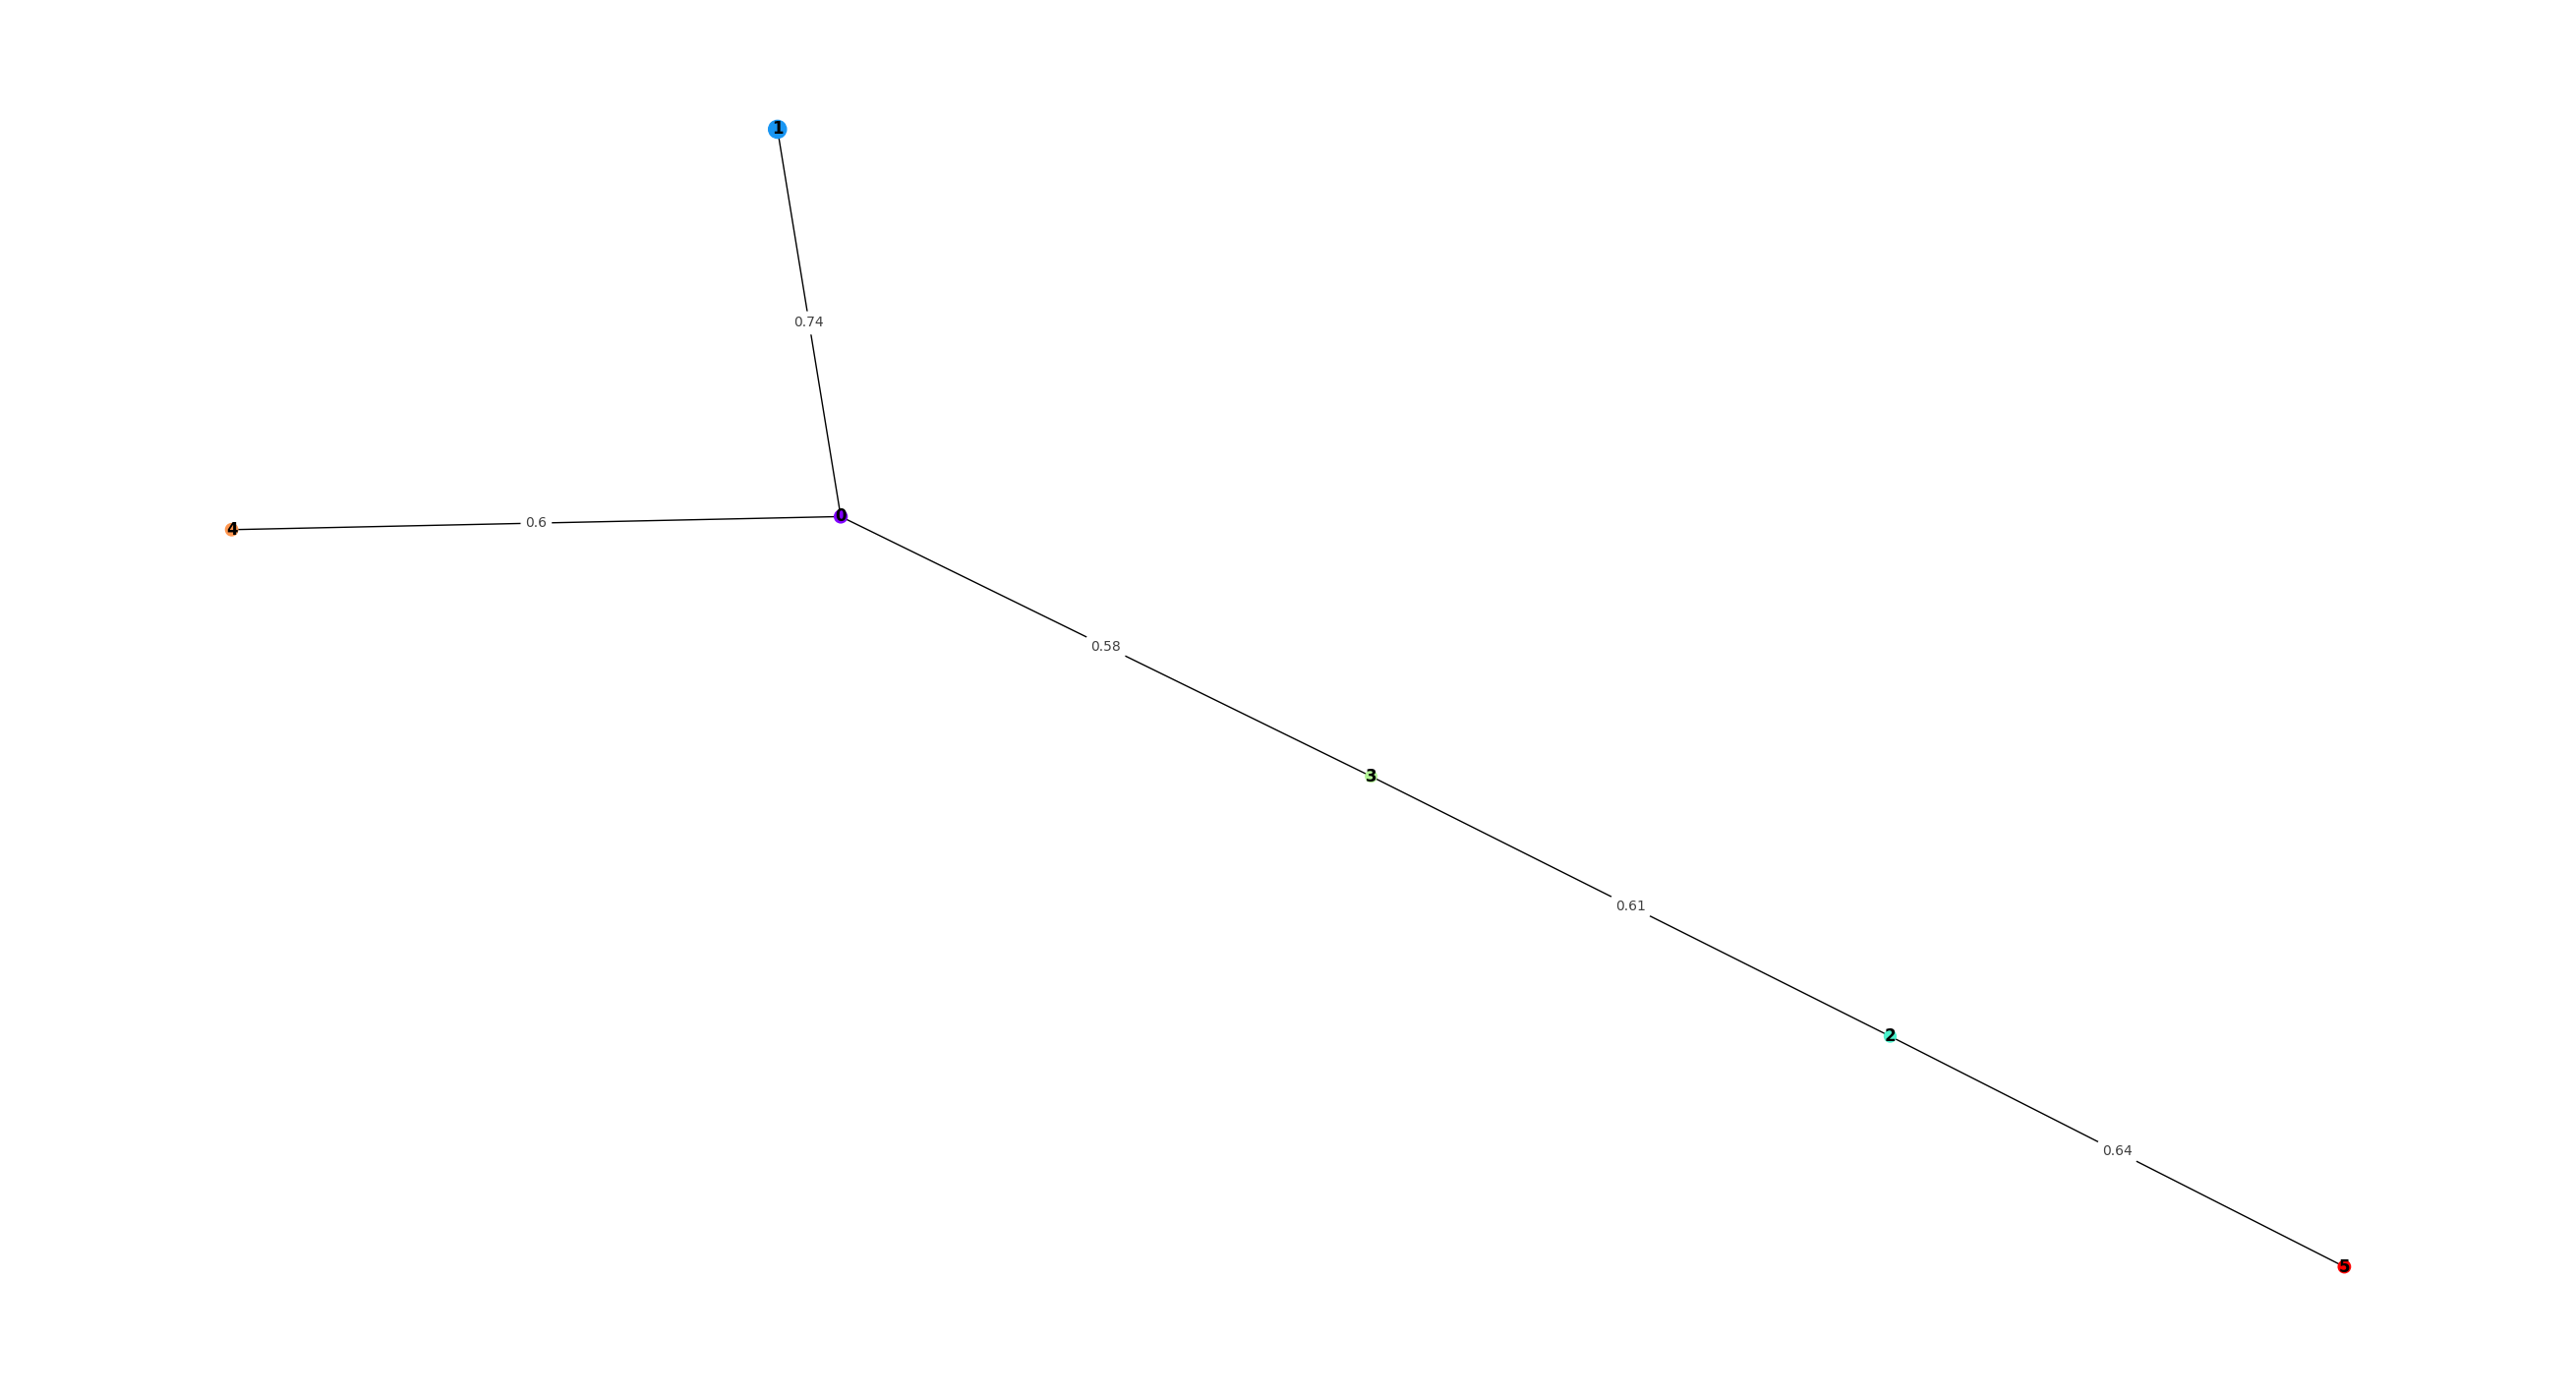

/home/linxy29/.conda/envs/SNPmanifold/lib/python3.8/site-packages/SNPmanifold/utils_tools.py:1272: RuntimeWarning: divide by zero encountered in divide
  f_stat = np.clip(1 / ratio_logit_var, 1.001, 20)


SNP-allelic ratios of 558 cells and 50 SNPs will be shown below.


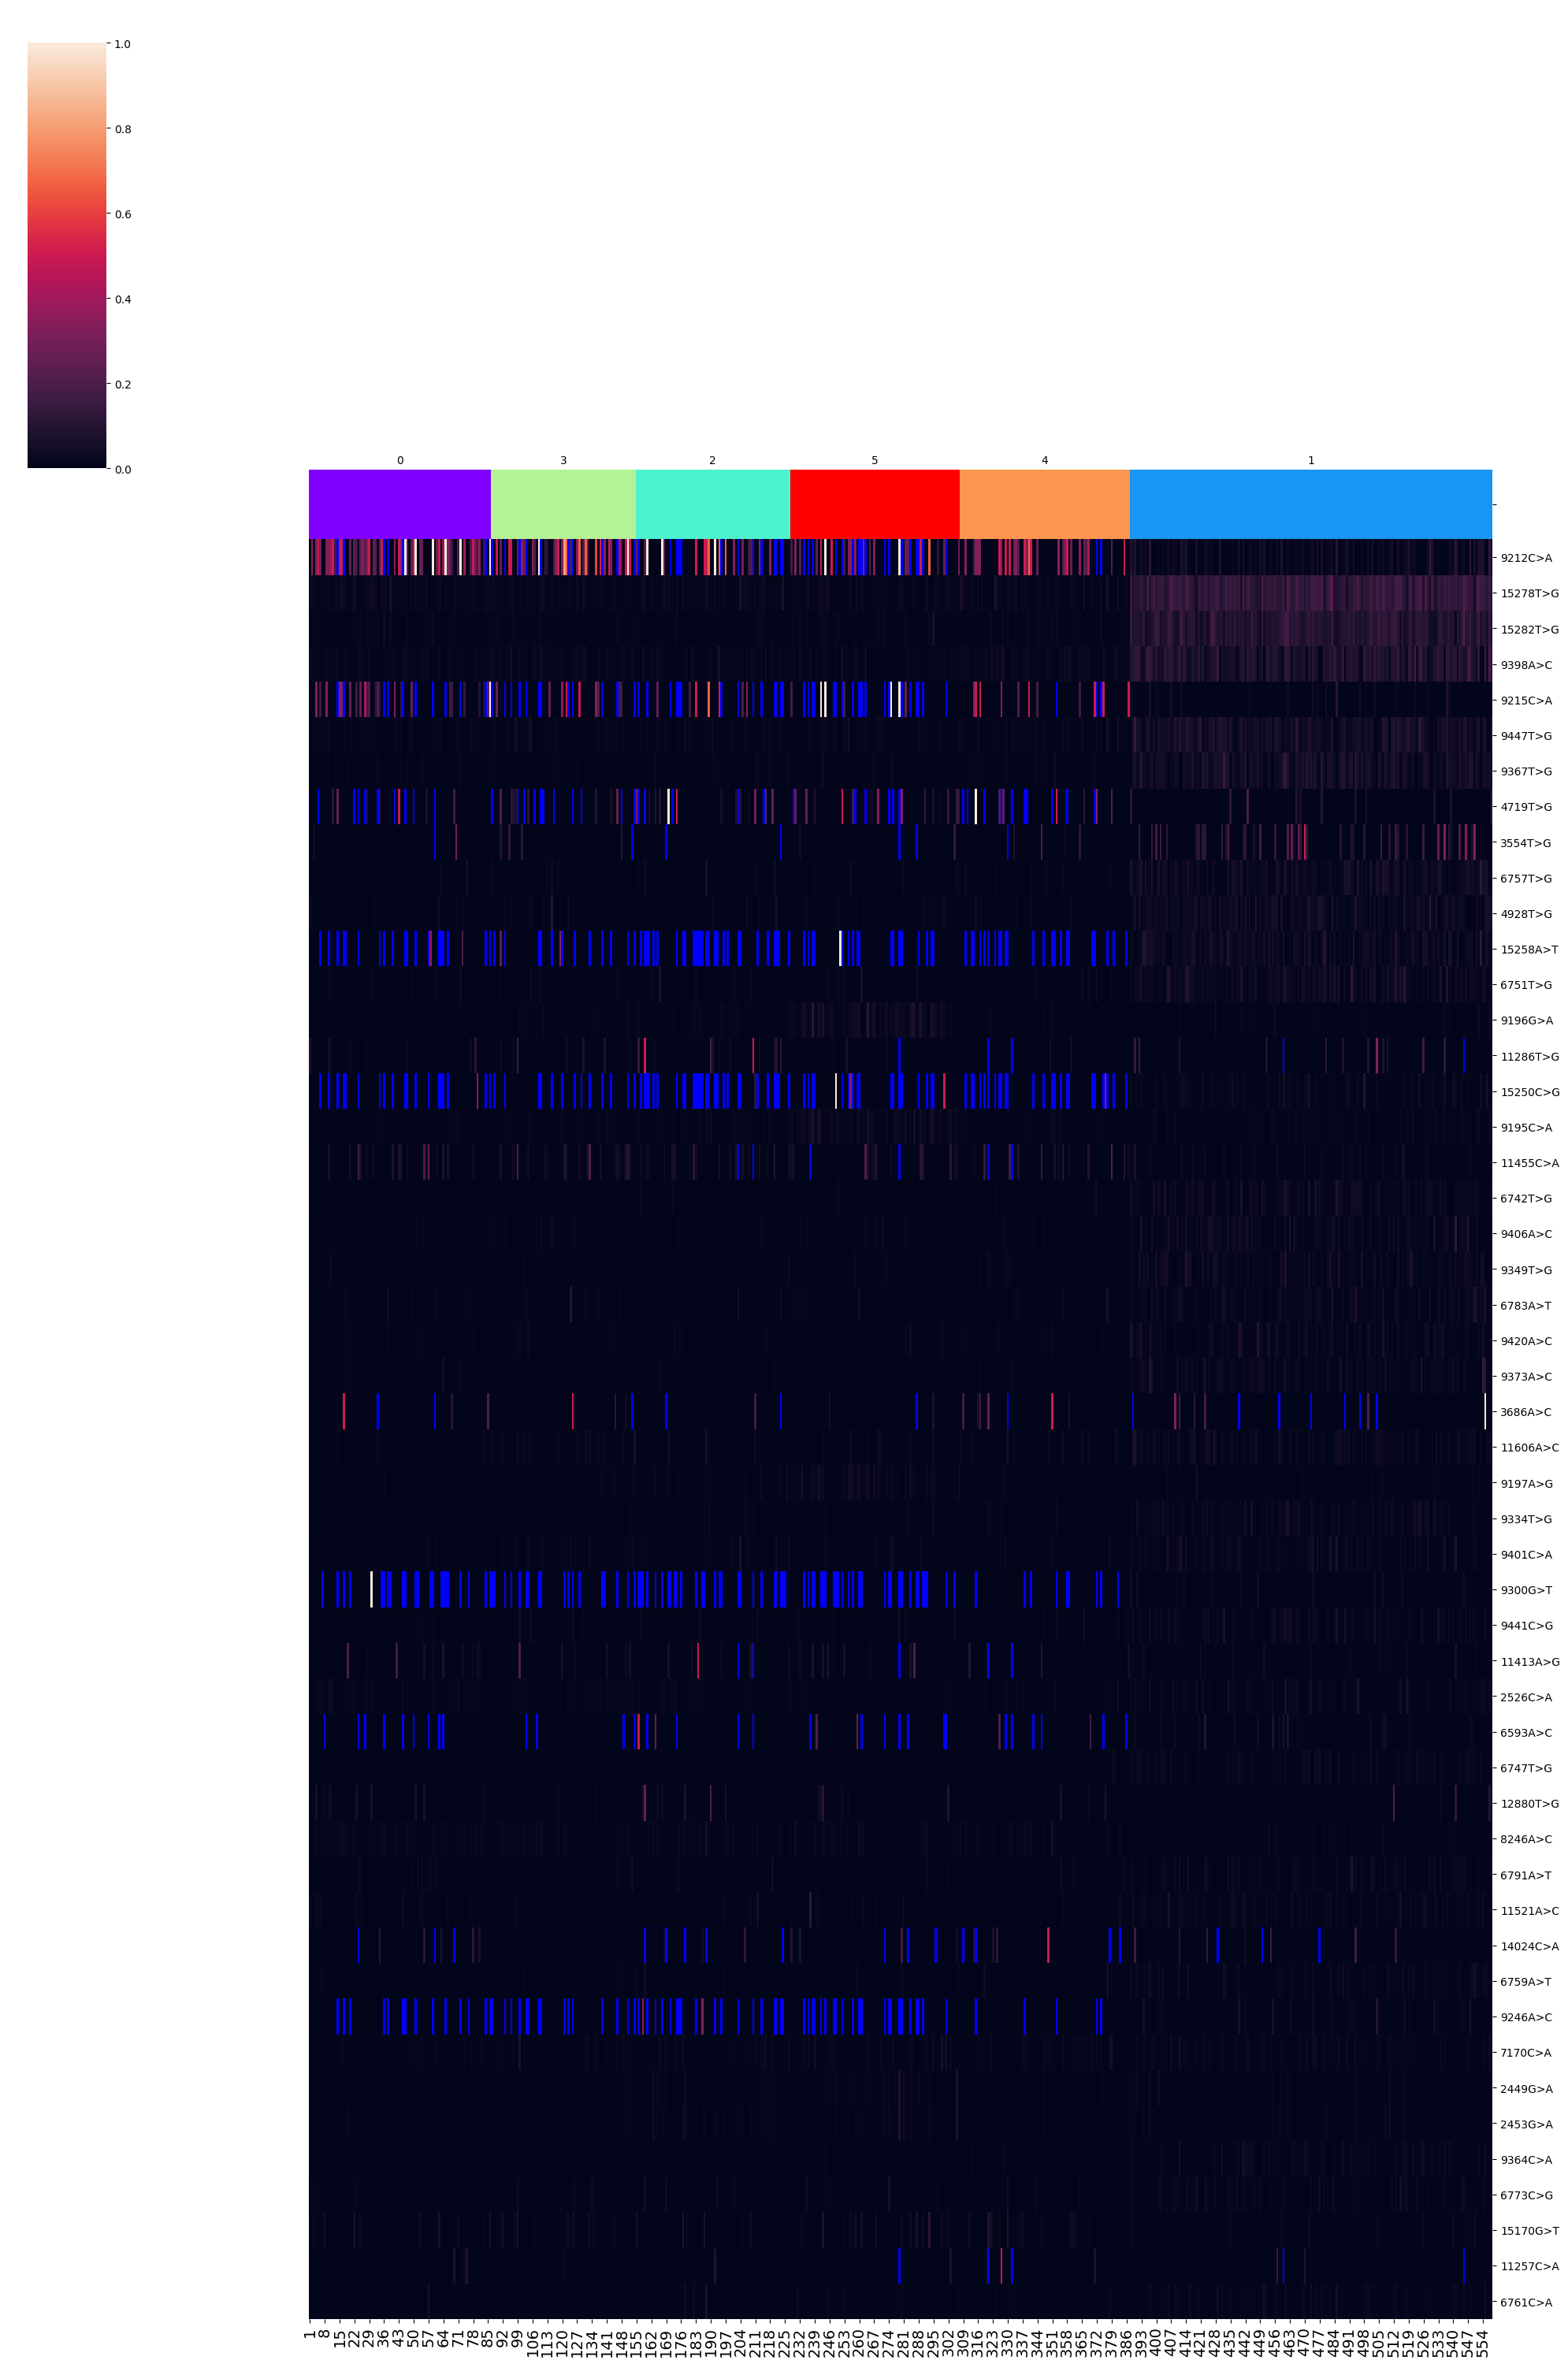

SNPs sorted by lowest p-value will be shown below


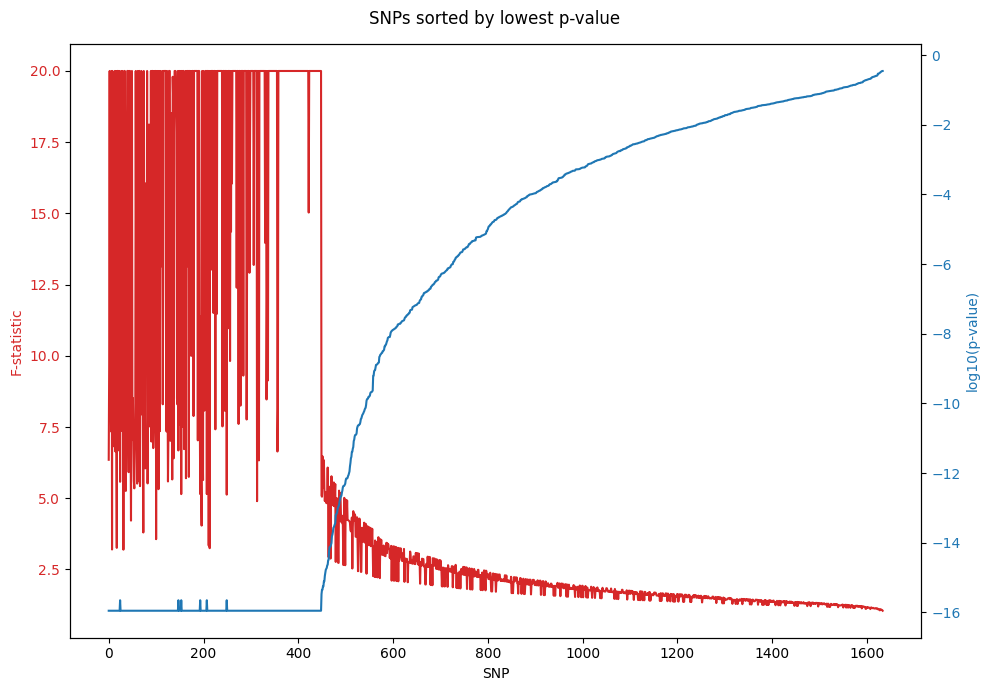

In [4]:
test1.phylogeny(6)

In [5]:
## add 'c' infront of the cluster number to get the clone
clone = np.char.add("c", test1.labels[4].astype(str))
## save cloneID as txt file
np.savetxt(SNP_VAE_res + "cloneID.txt", clone, fmt = "%s")
## save cell_filter
np.savetxt(SNP_VAE_res + "cell_filter.txt", test1.cell_filter, fmt = "%s")
## save test1 as pickle file
open(SNP_VAE_res + "SNP_VAE.pkl", "wb").write(pickle.dumps(test1))

77052456

In [6]:
## load the SNP_VAE object
test1 = pickle.loads(open(SNP_VAE_res + "SNP_VAE.pkl", "rb").read())

In [7]:
### convert cell label to vector
df = test1.labels
### convert to dataframe
df = pd.DataFrame(df).T
### add 'label' in front of column names
df.columns = ['label_' + str(x) for x in df.columns]
### make dataframe with barcode and cell label
#df['barcode'] = barcode
df['cell_filter'] = test1.cell_filter

## add embedding coordinates
### add PCA coordinates
df['PCA_1'] = test1.pc.T[0]
df['PCA_2'] = test1.pc.T[1]
### add UMAP coordinates
df['UMAP_1'] = test1.embedding_2d.T[0]
df['UMAP_2'] = test1.embedding_2d.T[1]

## save dataframe as csv
df.to_csv(SNP_VAE_res + 'SNP_VAE_results.csv', index=True)